<a href="https://colab.research.google.com/github/flake313/Malashin/blob/main/4%269_GRAD_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

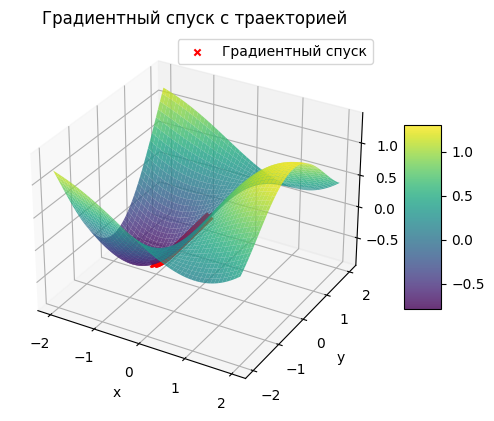

In [ ]:
import numpy as np
import matplotlib.pyplot as plt  # визуал
from mpl_toolkits.mplot3d import Axes3D

def function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * x**2 + 0.1 * y**2  # упрощенная функция

def derivative_x(x, y):
    return np.cos(x) * np.cos(y) + 0.2 * x  # частная производная для градиентного спуска

def derivative_y(x, y):
    return -np.sin(x) * np.sin(y) + 0.2 * y

def gradient_spusk(learning_shag, iteracii, eps):
    x = 0.5  # начальные значения переменных
    y = -0.5
    x_history = [x]  # списки для хранения истории значений переменных
    y_history = [y]

    for _ in range(iteracii):  # цикл выполняется макс 200 итераций
        grad_x = derivative_x(x, y)  # вычисление градиентов функции по x и y
        grad_y = derivative_y(x, y)

        # вычисляем новые значения x и y
        new_x = x - learning_shag * grad_x
        new_y = y - learning_shag * grad_y

        # проверяем условие остановки
        if abs(new_x - x) < eps and abs(new_y - y) < eps:
            print(f"Градиентный спуск остановился на {_} итерации.")
            break

        # обновляем значения x и y
        x, y = new_x, new_y
        x_history.append(x)  # добавление новых значений x и y в историю
        y_history.append(y)

    return x_history, y_history  # функция возвращает списки значений x и y на каждой итерации

learning_shag = 0.01
iteracii = 200
eps = 1e-6  # точность

# выполнение градиентного спуска
history_x, history_y = gradient_spusk(learning_shag, iteracii, eps)

def plot():
    # создаем объект 1x1 сетка, 1 график
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # создание сетки значений точек
    x_vals = np.linspace(-2, 2, 200)
    y_vals = np.linspace(-2, 2, 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = function(X, Y)

    # построение поверхности, цветовая карта viridis
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

    # разброс точек градиентного спуска
    ax.scatter(history_x, history_y, [function(x, y) for x, y in zip(history_x, history_y)],
               c='red', label='Градиентный спуск', marker='x')

    # траектория градиентного спуска
    for i in range(len(history_x) - 1):
        ax.plot([history_x[i], history_x[i+1]],
                [history_y[i], history_y[i+1]],
                [function(history_x[i], history_y[i]), function(history_x[i+1], history_y[i+1])],
                'gray')

    # отображение осей
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    # добавление цветовой шкалы
    fig.colorbar(surf, shrink=0.5, aspect=5)

    # заголовок
    plt.title('Градиентный спуск с траекторией')
    plt.legend()
    plt.show()

# построение графика
plot()

9

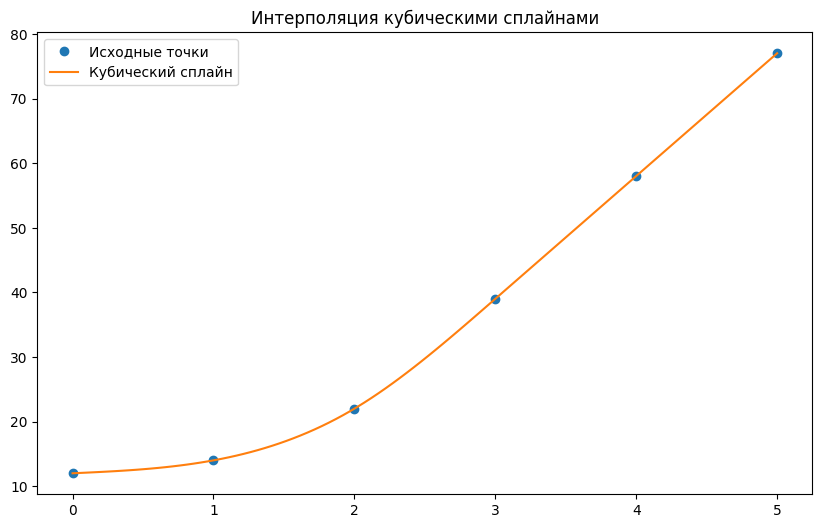

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class CubicSpline:
    def __init__(self, x, y):
        self.b, self.c, self.d = [], [], []
        self.x, self.y = x, y
        self.n = len(x) - 1
        self.calc_coefficients()

    def calc_coefficients(self):
        h = [self.x[i+1] - self.x[i] for i in range(self.n)]  # Расстояния между точками по оси x
        alpha = [3*(self.y[i+1] - self.y[i])/h[i] - 3*(self.y[i] - self.y[i-1])/h[i-1] for i in range(1, self.n)] # учит меняется наклон разн меж точк
        c = [0] * (self.n + 1) # нул знач коэф c
        l = [1] * (self.n + 1) # массив для пром знач
        mu = [0] * (self.n + 1) # помогает в расчет коэф
        z = [0] * (self.n + 1) # плавность кривой

        for i in range(1, self.n): # нахожд коэф
            l[i] = 2*(self.x[i+1] - self.x[i-1]) - h[i-1]*mu[i-1]
            mu[i] = h[i]/l[i]
            z[i] = (alpha[i-1] - h[i-1]*z[i-1])/l[i]

        b = [0] * (self.n + 1)
        self.c = [0] * (self.n + 1)
        self.d = [0] * (self.n + 1)

        for j in range(self.n-1, -1, -1): # работа с ними
            self.c[j] = z[j] - mu[j]*self.c[j+1]
            b[j] = (self.y[j+1] - self.y[j])/h[j] - h[j]*(self.c[j+1] + 2*self.c[j])/3
            self.d[j] = (self.c[j+1] - self.c[j])/(3*h[j])
        self.b = b

    def calc_spline(self, x): # расч в произв точке
        i = self.find_segment(x)
        dx = x - self.x[i]
        return self.y[i] + self.b[i]*dx + self.c[i]*dx**2 + self.d[i]*dx**3

    def find_segment(self, x): # поиск нужного
        for i in range(self.n):
            if self.x[i] <= x <= self.x[i+1]:
                return i
        raise ValueError(f'x = {x} is out of the interpolation range.')

# Пример использования:
x_points = [0, 1, 2, 3, 4, 5]
y_points = [12, 14, 22, 39, 58, 77]

spline = CubicSpline(x_points, y_points)

# Генерация точек для графика сплайна
x_vals = np.linspace(min(x_points), max(x_points), 100)
y_vals = [spline.calc_spline(x) for x in x_vals]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_points, y_points, 'o', label='Исходные точки')
plt.plot(x_vals, y_vals, label='Кубический сплайн')
plt.title('Интерполяция кубическими сплайнами')
plt.legend()
plt.show()